In [110]:
# Load libraries

# Function and modules for data preparation and visualization
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf

  
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

# Function and modules for data analysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Function and modules for the supervised regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

import statsmodels.api as sm

from pickle import dump
from pickle import load

# Time series models
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error metrics
from sklearn.metrics import mean_squared_error


# Feature selection and model evaluation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

# Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [111]:
start = datetime.datetime(2009, 4, 5)
end = datetime.datetime(2019, 4, 5)

stk_tickers = [ 'NKE', 'GS', 'JNJ', 'PFE', 'JPM']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers ,start='2009-04-05', end='2019-04-05')


[*********************100%%**********************]  5 of 5 completed


In [112]:
stk_data.head()

Price      Adj Close                                  Close                \
Ticker            GS     JNJ     JPM     NKE    PFE      GS    JNJ    JPM   
Date                                                                        
2009-04-06    90.749  33.579  19.450  10.656  7.365  116.65  52.20  28.20   
2009-04-07    90.305  33.039  18.795  10.363  7.258  116.08  51.36  27.25   
2009-04-08    89.271  33.097  18.919  10.442  7.241  114.75  51.45  27.43   
2009-04-09    96.724  33.071  22.589  11.071  7.279  124.33  51.41  32.75   
2009-04-13   101.251  32.904  23.244  11.040  7.241  130.15  51.15  33.70   

Price                       ...    Open                                \
Ticker         NKE     PFE  ...      GS    JNJ    JPM     NKE     PFE   
Date                        ...                                         
2009-04-06  12.818  13.008  ...  116.00  52.03  28.27  12.820  12.865   
2009-04-07  12.465  12.818  ...  114.00  51.89  27.28  12.592  12.922   
2009-04-08  12.560  12.789  ...  117.37  51.54  27.45  12.490  12.846   
2009-04-09  13.318  12.856  ...  119.79  51.99  30.44  12.812  12.922   
2009-04-13  13.280  12.789  ...  122.81  51.27  32.01  13.182  12.837   

Price         Volume                                           
Ticker            GS       JNJ        JPM       NKE       PFE  
Date                                                           
2009-04-06  21098100  12768700   72188000  11080000  62792893  
2009-04-07  22183000  13130100   73652600  11580000  52777680  
2009-04-08  20406200  10935000   66538300  13103200  44234799  
2009-04-09  25610700  15056300  147913000  18044400  57995612  
2009-04-13  36460800  12067200  110196200  13202000  44054249  

[5 rows x 30 columns]

In [113]:
ccy_data = web.DataReader(ccy_tickers, 'fred', start, end)
idx_data = web.DataReader(idx_tickers, 'fred', start, end)

In [114]:
stk_data.head()

Price      Adj Close                                  Close                \
Ticker            GS     JNJ     JPM     NKE    PFE      GS    JNJ    JPM   
Date                                                                        
2009-04-06    90.749  33.579  19.450  10.656  7.365  116.65  52.20  28.20   
2009-04-07    90.305  33.039  18.795  10.363  7.258  116.08  51.36  27.25   
2009-04-08    89.271  33.097  18.919  10.442  7.241  114.75  51.45  27.43   
2009-04-09    96.724  33.071  22.589  11.071  7.279  124.33  51.41  32.75   
2009-04-13   101.251  32.904  23.244  11.040  7.241  130.15  51.15  33.70   

Price                       ...    Open                                \
Ticker         NKE     PFE  ...      GS    JNJ    JPM     NKE     PFE   
Date                        ...                                         
2009-04-06  12.818  13.008  ...  116.00  52.03  28.27  12.820  12.865   
2009-04-07  12.465  12.818  ...  114.00  51.89  27.28  12.592  12.922   
2009-04-08  12.560  12.789  ...  117.37  51.54  27.45  12.490  12.846   
2009-04-09  13.318  12.856  ...  119.79  51.99  30.44  12.812  12.922   
2009-04-13  13.280  12.789  ...  122.81  51.27  32.01  13.182  12.837   

Price         Volume                                           
Ticker            GS       JNJ        JPM       NKE       PFE  
Date                                                           
2009-04-06  21098100  12768700   72188000  11080000  62792893  
2009-04-07  22183000  13130100   73652600  11580000  52777680  
2009-04-08  20406200  10935000   66538300  13103200  44234799  
2009-04-09  25610700  15056300  147913000  18044400  57995612  
2009-04-13  36460800  12067200  110196200  13202000  44054249  

[5 rows x 30 columns]

In [115]:
stk_data.tail()

Price      Adj Close                                    Close                  \
Ticker            GS      JNJ     JPM     NKE     PFE      GS     JNJ     JPM   
Date                                                                            
2019-03-29   169.960  121.979  87.153  79.940  33.074  191.99  139.79  101.23   
2019-04-01   174.165  121.272  90.089  80.908  33.362  196.74  138.98  104.64   
2019-04-02   174.837  120.164  90.520  80.092  33.417  197.50  137.71  105.14   
2019-04-03   177.812  119.693  90.701  80.187  33.362  200.86  137.17  105.35   
2019-04-04   179.025  118.297  91.577  80.956  33.285  202.23  135.57  105.56   

Price                      ...    Open                                 \
Ticker        NKE     PFE  ...      GS     JNJ     JPM    NKE     PFE   
Date                       ...                                          
2019-03-29  84.21  40.294  ...  192.68  139.28  101.54  84.60  40.228   
2019-04-01  85.23  40.645  ...  194.00  139.99  102.15  85.04  40.398   
2019-04-02  84.37  40.712  ...  196.24  139.01  104.60  85.00  40.750   
2019-04-03  84.47  40.645  ...  199.25  138.20  105.81  84.90  40.787   
2019-04-04  85.28  40.550  ...  200.80  136.87  104.55  84.49  40.598   

Price        Volume                                        
Ticker           GS      JNJ       JPM      NKE       PFE  
Date                                                       
2019-03-29  2632800  7168400  14523400  6492000  21681834  
2019-04-01  3562600  5885200  17499300  6737400  20345046  
2019-04-02  2247000  5517800  10295400  4433800  18625129  
2019-04-03  3227900  5947000  11499200  4080900  16200402  
2019-04-04  2582300  5844600  11952100  3660700  12990972  

[5 rows x 30 columns]

In [116]:
ccy_data.head()

,DEXJPUS,DEXUSUK
DATE,,
2009-04-06,100.65,1.471
2009-04-07,100.71,1.474
2009-04-08,99.95,1.469
2009-04-09,100.43,1.462
2009-04-10,100.30,1.464


In [117]:
idx_data.tail()

,SP500,DJIA,VIXCLS
DATE,,,
2019-04-01,2867.19,26258.42,13.40
2019-04-02,2867.24,26179.13,13.36
2019-04-03,2873.40,26218.13,13.74
2019-04-04,2879.39,26384.63,13.58
2019-04-05,2892.74,26424.99,12.82


In [118]:
return_period = 5

In [119]:
Y = np.log(stk_data.loc[:, ('Adj Close', 'NKE')]).diff(return_period).shift(-return_period)
Y.head(10)

Date
2009-04-06    0.003
2009-04-07    0.044
2009-04-08    0.068
2009-04-09    0.025
2009-04-13   -0.014
2009-04-14    0.036
2009-04-15    0.054
2009-04-16    0.011
2009-04-17    0.002
2009-04-20    0.033
Name: (Adj Close, NKE), dtype: float64

In [120]:
Y = np.log(stk_data.loc[:, ('Adj Close', 'NKE')])
Y.head(10)

Date
2009-04-06    2.366
2009-04-07    2.338
2009-04-08    2.346
2009-04-09    2.404
2009-04-13    2.402
2009-04-14    2.369
2009-04-15    2.382
2009-04-16    2.414
2009-04-17    2.429
2009-04-20    2.387
Name: (Adj Close, NKE), dtype: float64

In [121]:
Y = np.log(stk_data.loc[:, ('Adj Close', 'NKE')]).diff(return_period)
Y.head(10)

Date
2009-04-06      NaN
2009-04-07      NaN
2009-04-08      NaN
2009-04-09      NaN
2009-04-13      NaN
2009-04-14    0.003
2009-04-15    0.044
2009-04-16    0.068
2009-04-17    0.025
2009-04-20   -0.014
Name: (Adj Close, NKE), dtype: float64

In [122]:
Y = np.log(stk_data.loc[:, ('Adj Close', 'NKE')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'
Y.head(10)

Date
2009-04-06    0.003
2009-04-07    0.044
2009-04-08    0.068
2009-04-09    0.025
2009-04-13   -0.014
2009-04-14    0.036
2009-04-15    0.054
2009-04-16    0.011
2009-04-17    0.002
2009-04-20    0.033
Name: NKE_pred, dtype: float64

In [123]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GS', 'JNJ', 'PFE', 'JPM'))]).diff(return_period)
X1.columns

MultiIndex([('Adj Close',  'GS'),
            ('Adj Close', 'JNJ'),
            ('Adj Close', 'PFE'),
            ('Adj Close', 'JPM')],
           names=['Price', 'Ticker'])

In [124]:
X1.columns = X1.columns.droplevel()
X1.columns

Index(['GS', 'JNJ', 'PFE', 'JPM'], dtype='object', name='Ticker')

In [125]:
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
print(X2.columns, X3.columns)

Index(['DEXJPUS', 'DEXUSUK'], dtype='object') Index(['SP500', 'DJIA', 'VIXCLS'], dtype='object')


In [126]:
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'NKE')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['NKE_DT', 'NKE_3DT', 'NKE_6DT', 'NKE_12DT']

In [127]:
X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [128]:
dataset.head()

,NKE_pred,GS,JNJ,PFE,JPM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NKE_DT,NKE_3DT,NKE_6DT,NKE_12DT
2014-03-31,-0.042,-0.011,0.031,0.020,-0.006,7.505e-03,0.011,0.008,0.011,-0.084,-0.013,-6.702e-02,-0.013,-0.055
2014-04-07,0.022,-0.033,-0.003,-0.029,-0.022,5.825e-04,-0.004,-0.015,-0.013,0.115,-0.042,-1.089e-01,-0.091,-0.082
2014-04-14,0.027,-0.024,-0.008,-0.044,-0.071,-1.201e-02,0.007,-0.008,-0.004,0.034,0.022,-3.369e-02,-0.067,-0.030
2014-04-22,-0.025,0.036,0.031,0.037,0.015,9.794e-03,0.006,0.020,0.015,-0.168,0.027,6.612e-03,-0.060,0.040
2014-04-30,-0.011,-0.004,0.011,0.012,-0.001,-1.174e-03,0.007,0.005,0.005,0.010,-0.016,4.112e-04,-0.088,0.032


In [129]:
pd.set_option('display.precision', 3)

In [130]:
dataset.head()

,NKE_pred,GS,JNJ,PFE,JPM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NKE_DT,NKE_3DT,NKE_6DT,NKE_12DT
2014-03-31,-0.042,-0.011,0.031,0.020,-0.006,7.505e-03,0.011,0.008,0.011,-0.084,-0.013,-6.702e-02,-0.013,-0.055
2014-04-07,0.022,-0.033,-0.003,-0.029,-0.022,5.825e-04,-0.004,-0.015,-0.013,0.115,-0.042,-1.089e-01,-0.091,-0.082
2014-04-14,0.027,-0.024,-0.008,-0.044,-0.071,-1.201e-02,0.007,-0.008,-0.004,0.034,0.022,-3.369e-02,-0.067,-0.030
2014-04-22,-0.025,0.036,0.031,0.037,0.015,9.794e-03,0.006,0.020,0.015,-0.168,0.027,6.612e-03,-0.060,0.040
2014-04-30,-0.011,-0.004,0.011,0.012,-0.001,-1.174e-03,0.007,0.005,0.005,0.010,-0.016,4.112e-04,-0.088,0.032


In [131]:
dataset.describe()

,NKE_pred,GS,JNJ,PFE,JPM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NKE_DT,NKE_3DT,NKE_6DT,NKE_12DT
count,238.000,2.380e+02,2.380e+02,238.000,238.000,2.380e+02,2.380e+02,238.000,238.000,238.000,238.000,238.000,238.000,238.000
mean,0.004,2.096e-04,1.764e-03,0.002,0.002,-1.594e-07,-8.190e-04,0.001,0.001,0.005,0.003,0.010,0.020,0.039
std,0.028,3.007e-02,1.968e-02,0.023,0.027,1.286e-02,1.380e-02,0.016,0.016,0.163,0.028,0.045,0.065,0.090
min,-0.085,-9.674e-02,-8.935e-02,-0.066,-0.078,-4.496e-02,-1.112e-01,-0.073,-0.071,-0.342,-0.096,-0.119,-0.133,-0.191
25%,-0.014,-1.789e-02,-7.806e-03,-0.012,-0.011,-6.888e-03,-8.291e-03,-0.005,-0.007,-0.096,-0.013,-0.017,-0.024,-0.032
50%,0.006,2.753e-03,8.686e-04,0.002,0.003,1.281e-04,-7.817e-04,0.004,0.004,-0.016,0.005,0.012,0.024,0.046
75%,0.020,1.941e-02,1.345e-02,0.014,0.019,7.138e-03,7.425e-03,0.011,0.011,0.078,0.019,0.041,0.063,0.107
max,0.113,1.420e-01,6.480e-02,0.074,0.129,5.605e-02,5.023e-02,0.050,0.047,0.781,0.113,0.102,0.182,0.243


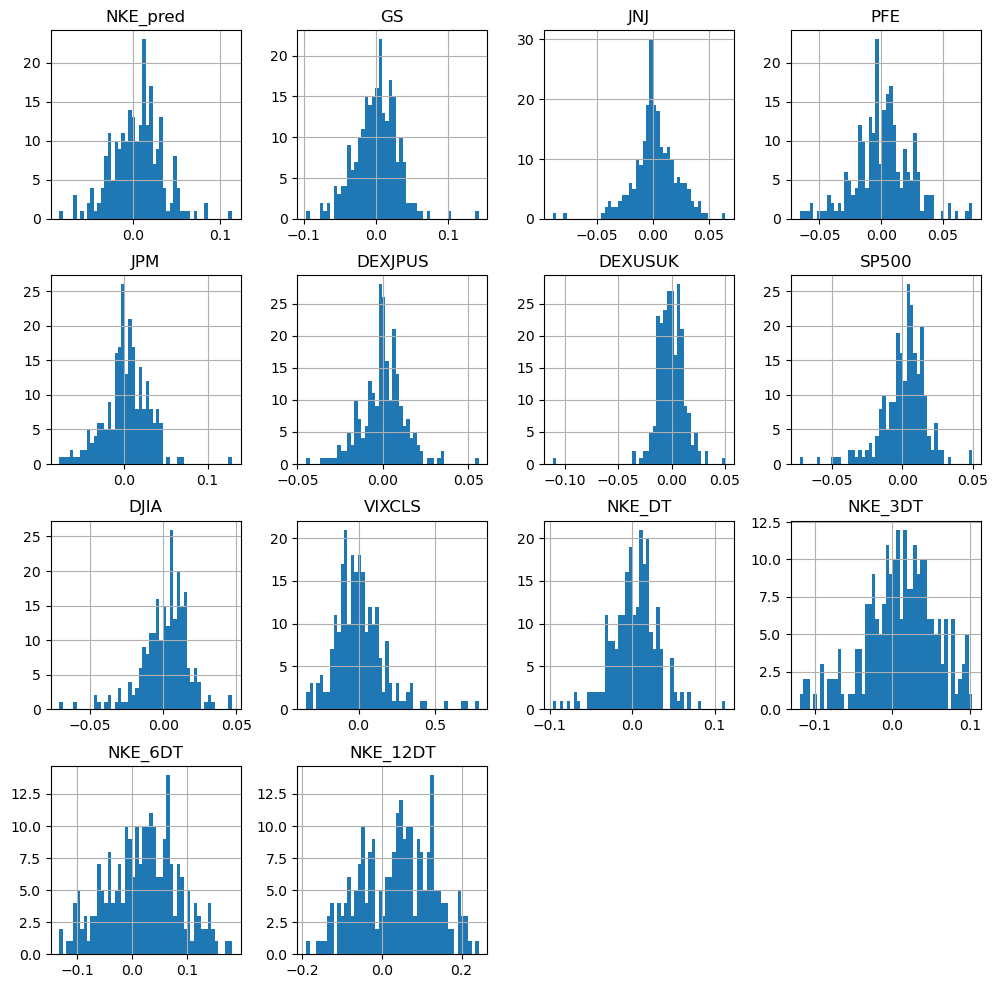

In [132]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(12,12))
#pyplot.show()
pyplot.savefig('hist.pdf')

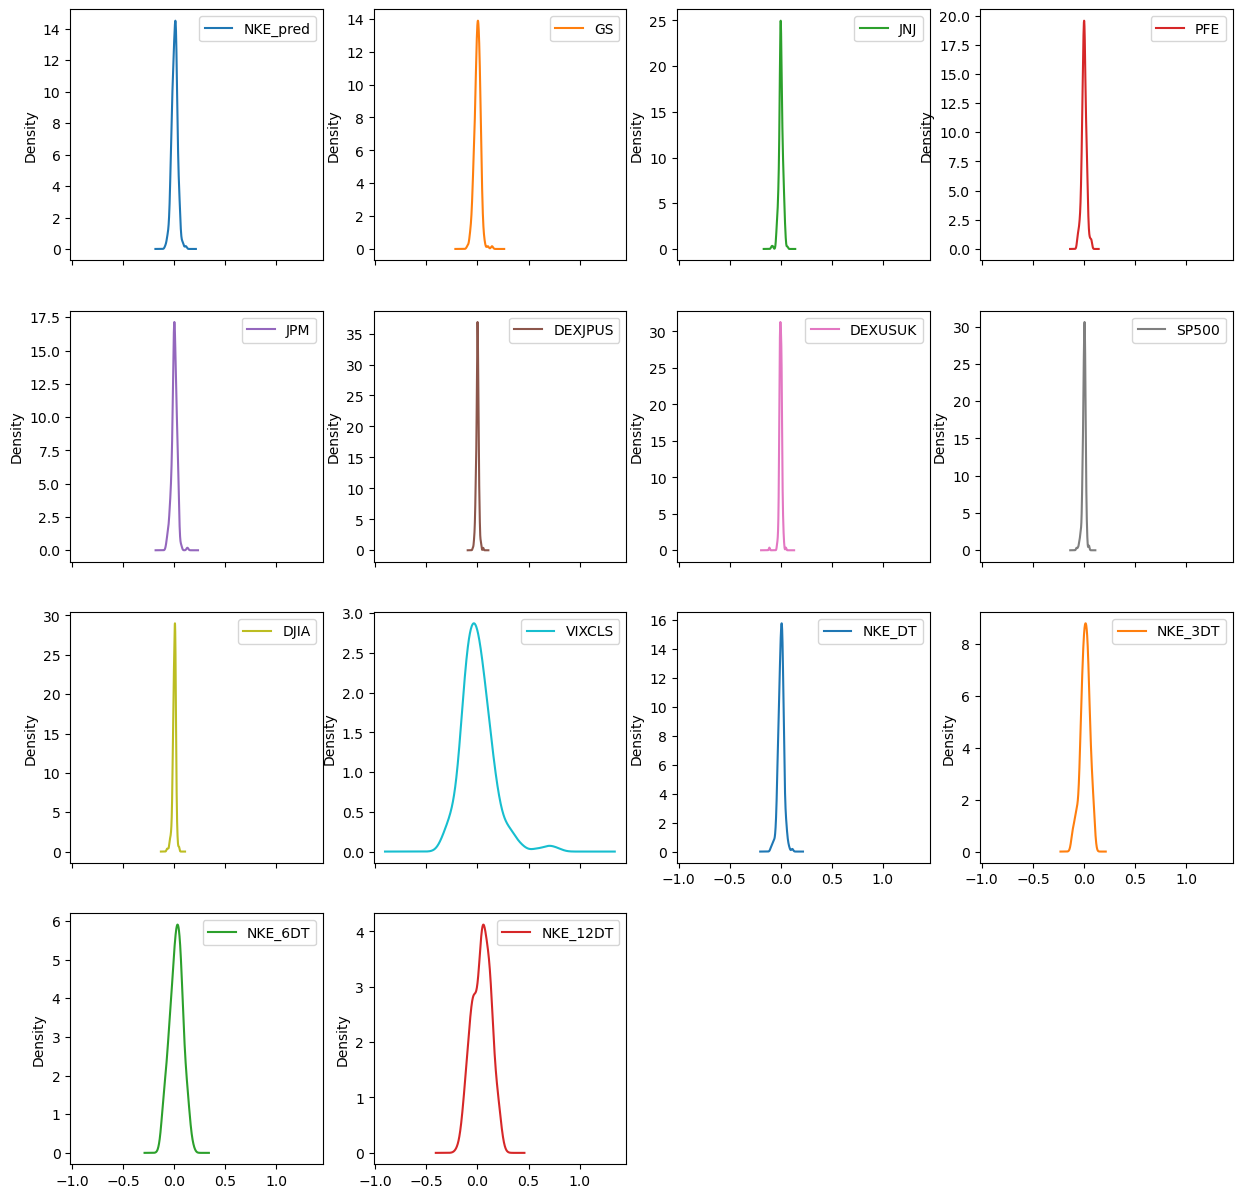

In [133]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=10, figsize=(15,15))
#pyplot.show()
pyplot.savefig('density.pdf')

In [134]:
validation_size = 0.2

# In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# In case the data is dependent on the time series, then train and test split should be done based on sequential sample
# This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [135]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

In [136]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))


In [137]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds) # KFold(n_splits=num_folds, random_state=seed)
    # converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%5s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

   LR: 0.000893 (0.000531) 0.000751 0.000710
LASSO: 0.000807 (0.000464) 0.000802 0.000808
   EN: 0.000807 (0.000464) 0.000802 0.000808
  KNN: 0.000930 (0.000393) 0.000610 0.000782
 CART: 0.001528 (0.000321) 0.000000 0.001658
  SVR: 0.000951 (0.000561) 0.000917 0.000826
  MLP: 0.001785 (0.001342) 0.000922 0.000994
  ABR: 0.000858 (0.000436) 0.000380 0.000867
  GBR: 0.000956 (0.000465) 0.000076 0.001010
  RFR: 0.000856 (0.000476) 0.000115 0.000811
  ETR: 0.000831 (0.000414) 0.000000 0.000886


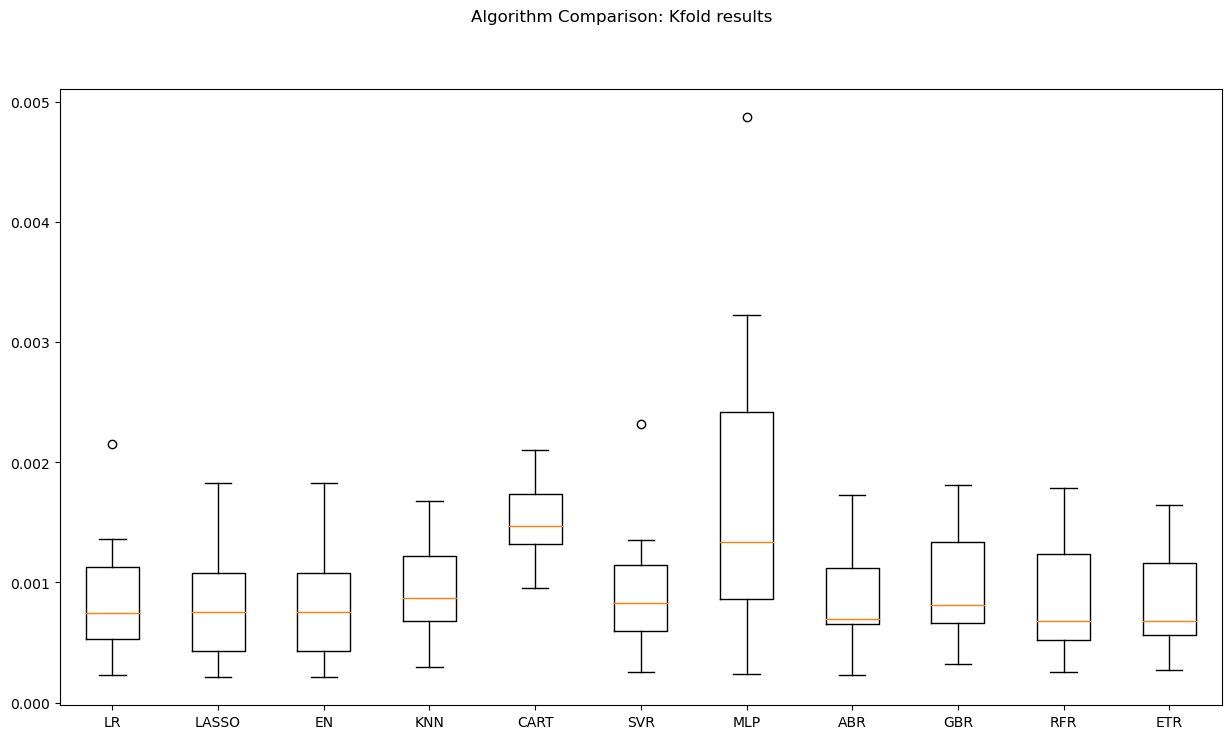

In [138]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
#pyplot.show()
pyplot.savefig('box.pdf')

In [139]:
# ARIMA
X_train_ARIMA=X_train.loc[:, ['GS', 'JNJ', 'PFE', 'JPM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
X_test_ARIMA=X_test.loc[:, ['GS', 'JNJ', 'PFE', 'JPM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

<Axes: title={'center': 'Correlation Matrix'}>

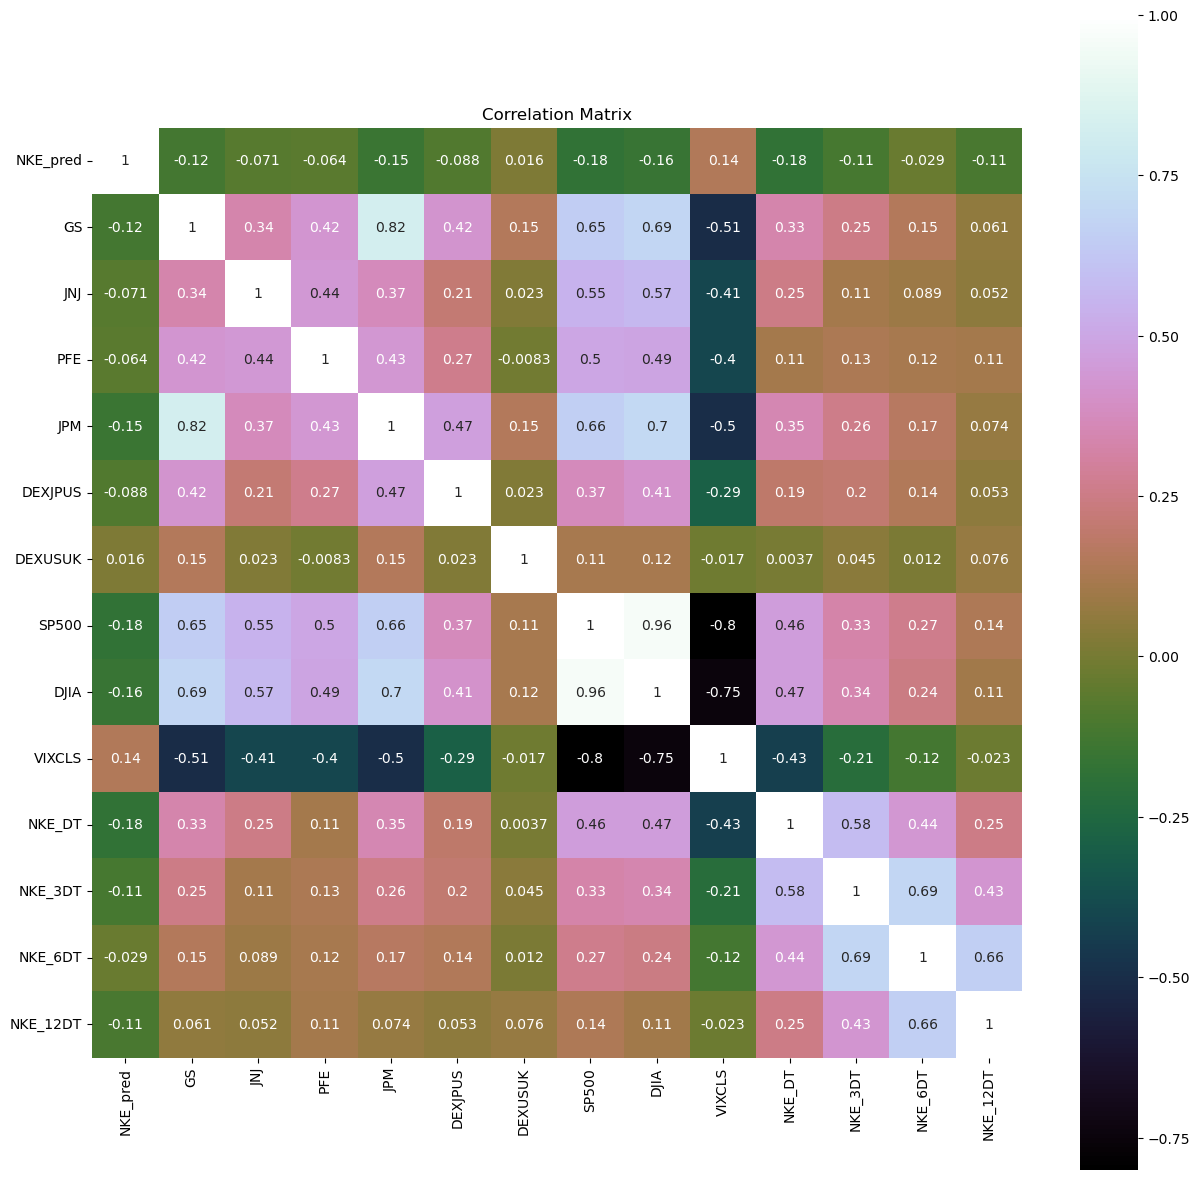

In [67]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

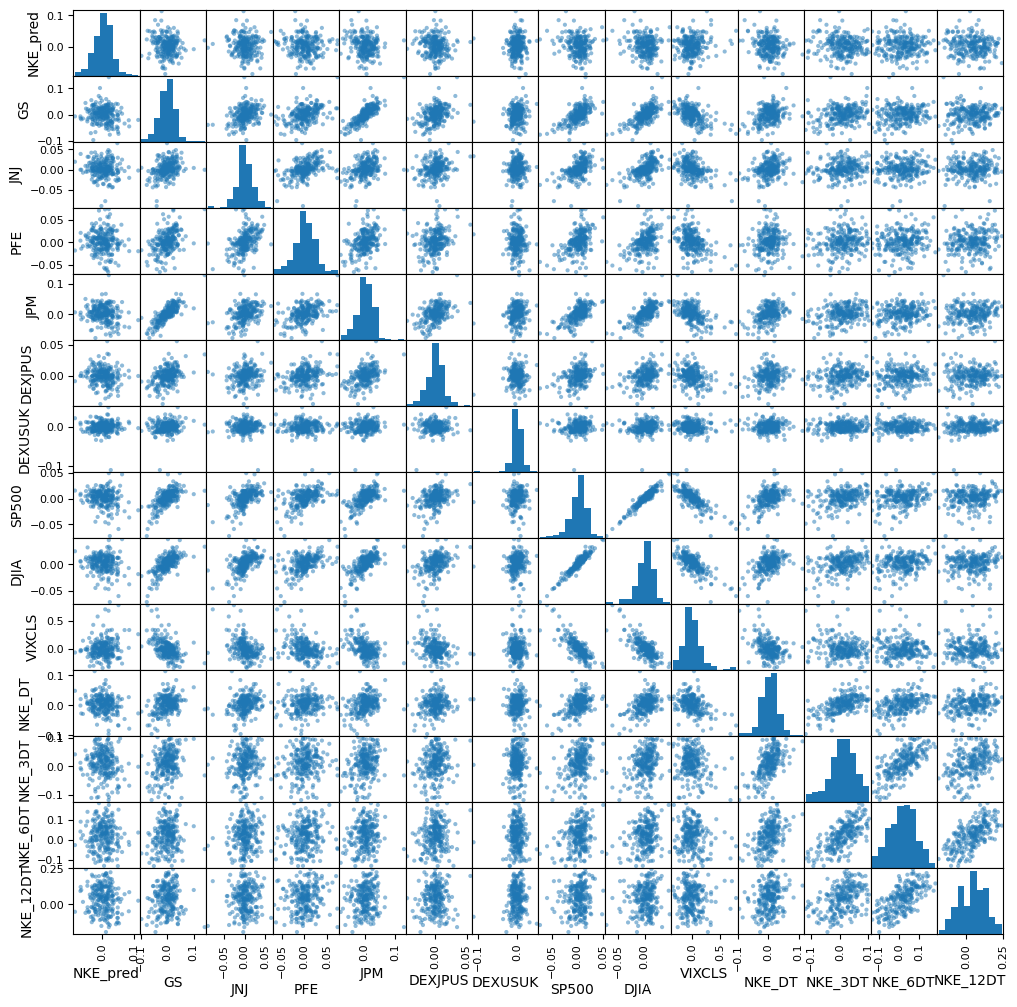

In [68]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
#pyplot.show()
pyplot.savefig('scatter.pdf')

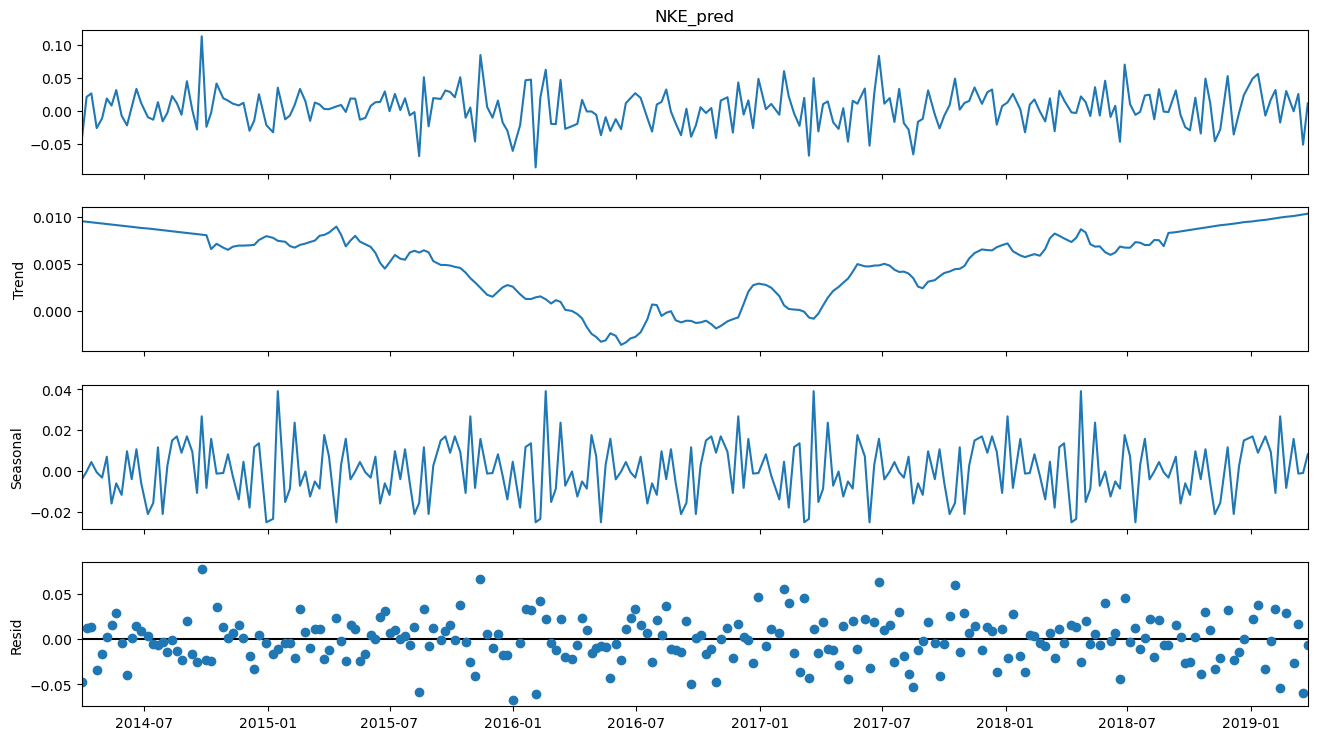

In [69]:
res = sm.tsa.seasonal_decompose(Y,period=52, extrapolate_trend='freq')
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
#pyplot.show()
pyplot.savefig('time_series.pdf')

In [70]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
NKE_DT,7.512
SP500,7.498
DJIA,6.097
JPM,5.606
VIXCLS,5.002
GS,3.586
NKE_3DT,3.156
NKE_12DT,2.721
DEXJPUS,1.852


In [71]:
validation_size = 0.2

# In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# In case the data is dependent on the time series, then train and test split should be done based on sequential sample
# This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [72]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

* 5.3.1 Machine Learning models-from scikit-learn
* regression and tree regression algorithms

In [73]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [74]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds) # KFold(n_splits=num_folds, random_state=seed)
    # converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%5s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

   LR: 0.000893 (0.000531) 0.000751 0.000710
LASSO: 0.000807 (0.000464) 0.000802 0.000808
   EN: 0.000807 (0.000464) 0.000802 0.000808
  KNN: 0.000930 (0.000393) 0.000610 0.000782
 CART: 0.001413 (0.000339) 0.000000 0.001815
  SVR: 0.000951 (0.000561) 0.000917 0.000826
  MLP: 0.001892 (0.000740) 0.001480 0.001729
  ABR: 0.000854 (0.000429) 0.000391 0.000848
  GBR: 0.000961 (0.000448) 0.000076 0.001016
  RFR: 0.000856 (0.000462) 0.000122 0.000822
  ETR: 0.000830 (0.000426) 0.000000 0.000850


* traing and test error

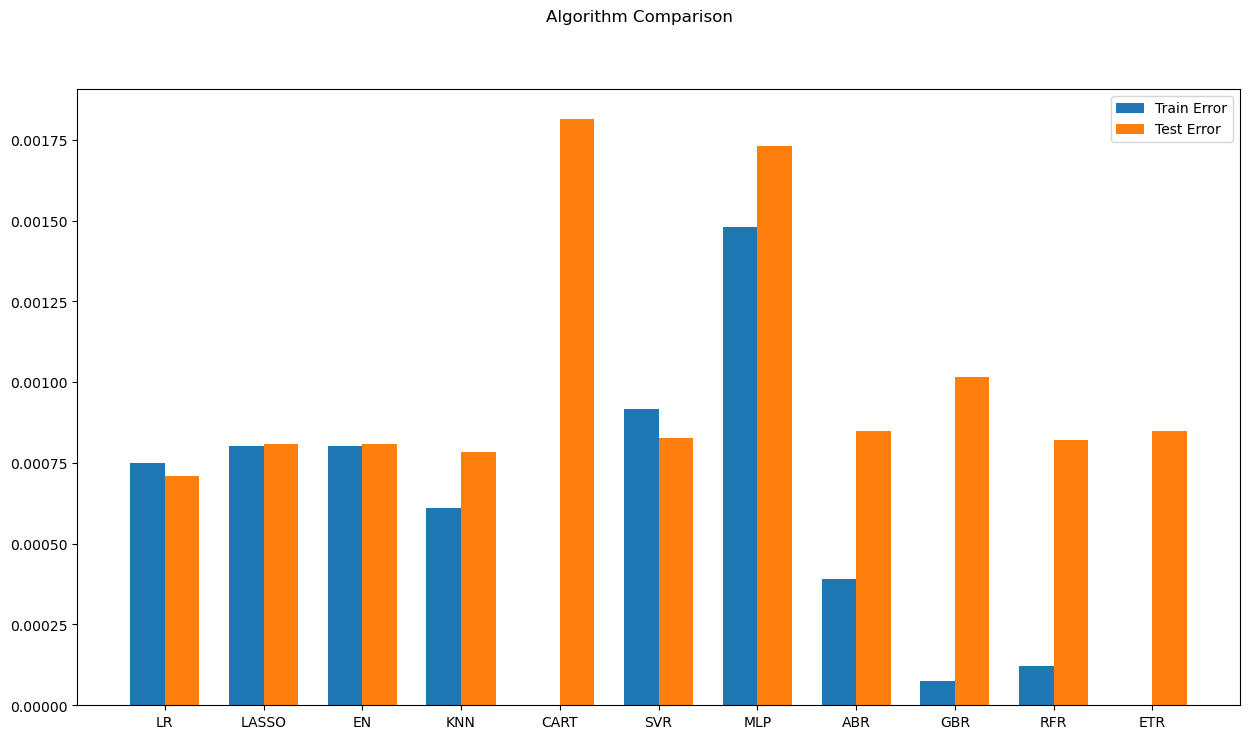

In [75]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
# pyplot.show()
pyplot.savefig('compare.pdf')

In [76]:
seq_len = 2 # Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define function to create LSTM model
def create_LSTMmodel(neurons=12, learn_rate=0.01, momentum=0):
    # Create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    # More layers can be added if needed 
    model.add(Dense(1))
    
    # Compile the model with Adam optimizer
    model.compile(loss='mse', optimizer='adam')
    return model

# Assuming X_train_LSTM, Y_train_LSTM, X_test_LSTM, Y_test_LSTM are your training and testing data
# Train the LSTM model
LSTMModel = create_LSTMmodel(12, learn_rate=0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM), epochs=330, batch_size=72, verbose=0, shuffle=False)


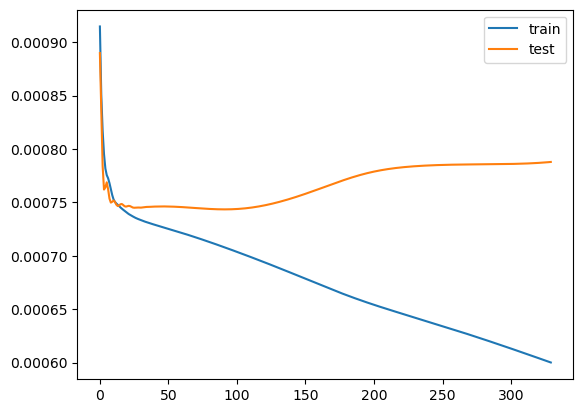

In [84]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [85]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [87]:

test_results.append(error_Test_LSTM)


train_results.append(error_Training_LSTM)


names.append("LSTM")

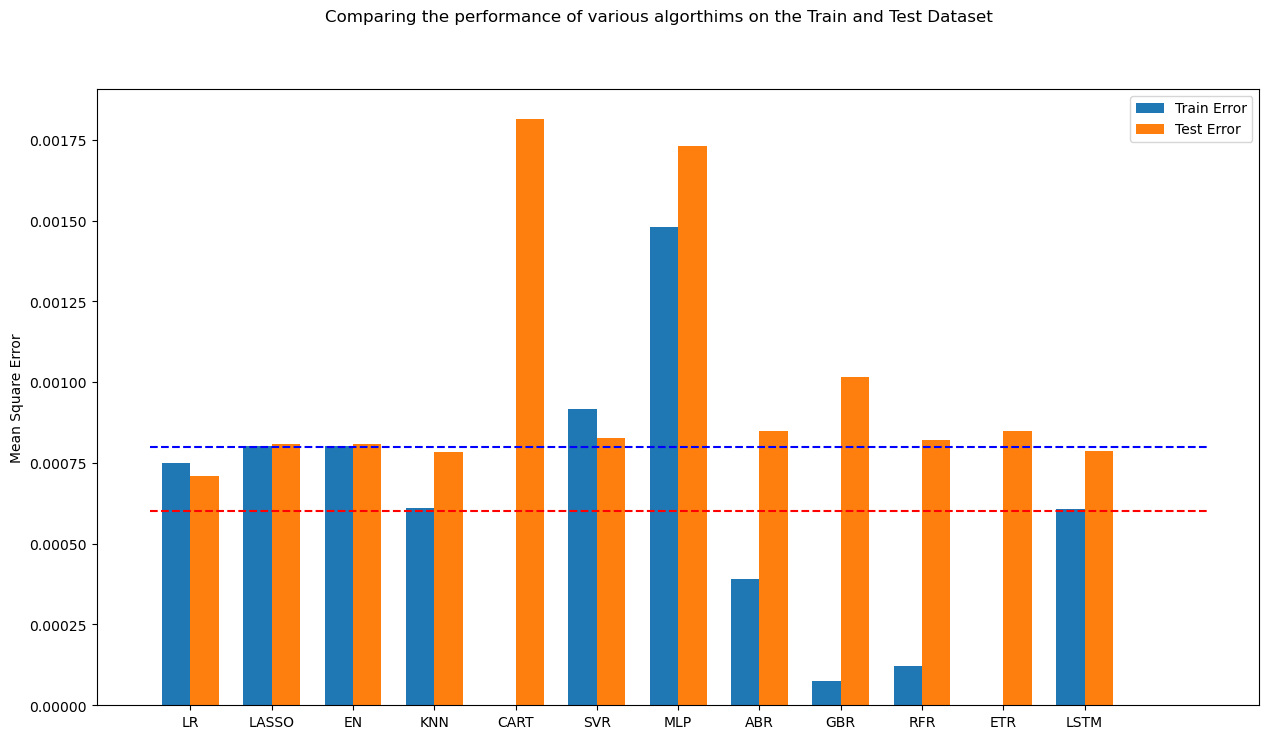

In [88]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.plot([-0.5,12.5], [0.0006,0.0006],'r--')
pyplot.plot([-0.5,12.5], [0.0008,0.0008],'b--')
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
# pyplot.show()
pyplot.savefig('mse.pdf')

In [101]:
X_train_ARIMA=X_train.loc[:, ['GS', 'JNJ', 'PFE', 'JPM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
X_test_ARIMA=X_test.loc[:, ['GS', 'JNJ', 'PFE', 'JPM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
#tr_len = len(X_train_ARIMA)
#te_len = len(X_test_ARIMA)
#to_len = len (X)

In [140]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

In [141]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = '2009-04-06' ,end = '2017-04-03', exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [92]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

In [94]:
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)

evaluate_models(p_values, d_values, q_values)   

/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) MSE=0.0007765


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

ARIMA(0, 0, 1) MSE=0.0007722
ARIMA(0, 1, 0) MSE=0.0015479


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

ARIMA(0, 1, 1) MSE=0.0008309


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(1, 0, 0) MSE=0.0007730


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(1, 0, 1) MSE=0.0007746


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(1, 1, 0) MSE=0.0012381


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(1, 1, 1) MSE=0.0008259


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(2, 0, 0) MSE=0.0007675


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(2, 0, 1) MSE=0.0007777


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(2, 1, 0) MSE=0.0010139
ARIMA(2, 1, 1) MSE=0.0008133
Best ARIMA(2, 0, 0) MSE=0.0007675


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
# prepare model
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

In [96]:
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0007635453847192772


/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yuri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [97]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model_fit_tuned, open(filename, 'wb'))

NameError: name 'y_test' is not defined

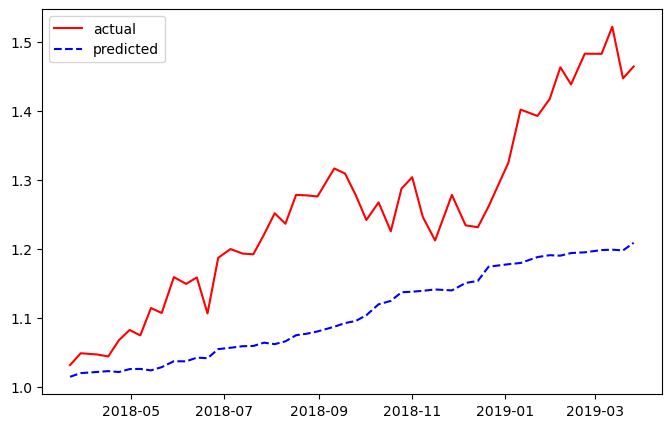

<Figure size 1000x600 with 0 Axes>

In [100]:
# Use the following code to produce the comparison of actual vs. predicted

# plotting the actual data versus predicted data
predicted_tuned.index = Y_test.index
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual') 

# plotting t, a separately 
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
# pyplot.show()
pyplot.savefig('predict.pdf')

pyplot.figure(figsize=(10, 6))
pyplot.scatter(y_test, predictions, color='blue')
pyplot.xlabel('실제 종가')
pyplot.ylabel('예측 종가')
pyplot.title('주식 종가 예측 결과')
pyplot.show()